In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [143]:
#Loading the 6 datasets.

JAN = pd.read_csv('/Users/vijaykumarreddyvoddi/Downloads/JCData18/JC1.csv')
FEB = pd.read_csv('/Users/vijaykumarreddyvoddi/Downloads/JCData18/JC2.csv')
MAR = pd.read_csv('/Users/vijaykumarreddyvoddi/Downloads/JCData18/JC3.csv')
APR = pd.read_csv('/Users/vijaykumarreddyvoddi/Downloads/JCData18/JC4.csv')
MAY = pd.read_csv('/Users/vijaykumarreddyvoddi/Downloads/JCData18/JC5.csv')
JUN = pd.read_csv('/Users/vijaykumarreddyvoddi/Downloads/JCData18/JC6.csv')

In [144]:
#Combining into one dataset.

Data = JAN.append([FEB, MAR, APR, MAY, JUN])

In [145]:
Data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,932,2018-01-01 02:06:17.5410,2018-01-01 02:21:50.0270,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31929,Subscriber,1992,1
1,550,2018-01-01 12:06:18.0390,2018-01-01 12:15:28.4430,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31845,Subscriber,1969,2
2,510,2018-01-01 12:06:56.9780,2018-01-01 12:15:27.8100,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31708,Subscriber,1946,1
3,354,2018-01-01 14:53:10.1860,2018-01-01 14:59:05.0960,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,31697,Subscriber,1994,1
4,250,2018-01-01 17:34:30.1920,2018-01-01 17:38:40.9840,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,40.719252,-74.034234,31861,Subscriber,1991,1


In [146]:
Data.insert(0, 'trip id', range(1, 1 + len(Data)))

In [147]:
Data.head()

,trip id,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1,932,2018-01-01 02:06:17.5410,2018-01-01 02:21:50.0270,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31929,Subscriber,1992,1
1,2,550,2018-01-01 12:06:18.0390,2018-01-01 12:15:28.4430,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31845,Subscriber,1969,2
2,3,510,2018-01-01 12:06:56.9780,2018-01-01 12:15:27.8100,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,31708,Subscriber,1946,1
3,4,354,2018-01-01 14:53:10.1860,2018-01-01 14:59:05.0960,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,31697,Subscriber,1994,1
4,5,250,2018-01-01 17:34:30.1920,2018-01-01 17:38:40.9840,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,40.719252,-74.034234,31861,Subscriber,1991,1


In [148]:
#Total number of rows.

len(Data)

143917

In [149]:
#Renaming the columns, taking out the space in between.

Data.columns = ['Trip_ID', 'Trip_Duration', 'Start_Time', 'Stop_Time', 'Start_Station_ID', 'Start_Station_Name',
                'Start_Station_Latitude', 'Start_Station_Longitude', 'End_Station_ID', 'End_Station_Name',
                'End_Station_Latitude', 'End_Station_Longitude', 'Bike_ID', 'User_Type', 'Birth_Year', 'Gender']

In [150]:
#Checking the number of null values.

Data.isnull().sum()

Trip_ID                    0
Trip_Duration              0
Start_Time                 0
Stop_Time                  0
Start_Station_ID           0
Start_Station_Name         0
Start_Station_Latitude     0
Start_Station_Longitude    0
End_Station_ID             0
End_Station_Name           0
End_Station_Latitude       0
End_Station_Longitude      0
Bike_ID                    0
User_Type                  0
Birth_Year                 0
Gender                     0
dtype: int64

In [151]:
#Checking data type.

Data.dtypes

Trip_ID                      int64
Trip_Duration                int64
Start_Time                  object
Stop_Time                   object
Start_Station_ID             int64
Start_Station_Name          object
Start_Station_Latitude     float64
Start_Station_Longitude    float64
End_Station_ID               int64
End_Station_Name            object
End_Station_Latitude       float64
End_Station_Longitude      float64
Bike_ID                      int64
User_Type                   object
Birth_Year                   int64
Gender                       int64
dtype: object

In [152]:
#Setting time variables data type as datetime to allow for timeseries analyses.

Data.Start_Time = pd.to_datetime(Data.Start_Time)
Data.Stop_Time = pd.to_datetime(Data.Stop_Time)

In [153]:
#Calculating appoximate user age.

Data['Age'] = 2018 - Data['Birth_Year']

In [154]:
#Creating function to create age category.

def Age_Category(Age):
    if (Age < 25):
        return '17 - 24'
    elif (Age >=25 and Age < 35):
        return '25 - 34'
    elif (Age >=35 and Age < 45):
        return '35 - 44'
    elif (Age >=45 and Age < 55):
        return '45 - 54'
    elif (Age >= 55 and Age < 150):
        return '55 and Above'
    else:
        return 'Other'

In [155]:
#Applying the function and converting data type of Age_Group to category.

Data['Age_Group'] = Data.Age.apply(Age_Category)
Data['Age_Group'] = Data['Age_Group'].astype("category")

In [156]:
#Converting data type of Gender to category.

Data['Gender'] = Data['Gender'].astype("category")

In [157]:
#Creating new variables to desribe the time of the Citi Bike trip.

Data['Month'] = Data['Start_Time'].dt.month
Data['Day_Year'] = Data['Start_Time'].dt.dayofyear
Data['Day_Week'] = Data['Start_Time'].dt.dayofweek
Data['Day_Month'] = Data['Start_Time'].dt.day
Data['Hour'] = Data['Start_Time'].dt.hour
Data['Date'] = Data['Start_Time'].dt.date

In [158]:
Data.head()

,Trip_ID,Trip_Duration,Start_Time,Stop_Time,Start_Station_ID,Start_Station_Name,Start_Station_Latitude,Start_Station_Longitude,End_Station_ID,End_Station_Name,...,Birth_Year,Gender,Age,Age_Group,Month,Day_Year,Day_Week,Day_Month,Hour,Date
0,1,932,2018-01-01 02:06:17.541,2018-01-01 02:21:50.027,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,...,1992,1,26,25 - 34,1,1,0,1,2,2018-01-01
1,2,550,2018-01-01 12:06:18.039,2018-01-01 12:15:28.443,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,...,1969,2,49,45 - 54,1,1,0,1,12,2018-01-01
2,3,510,2018-01-01 12:06:56.978,2018-01-01 12:15:27.810,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,...,1946,1,72,55 and Above,1,1,0,1,12,2018-01-01
3,4,354,2018-01-01 14:53:10.186,2018-01-01 14:59:05.096,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,...,1994,1,24,17 - 24,1,1,0,1,14,2018-01-01
4,5,250,2018-01-01 17:34:30.192,2018-01-01 17:38:40.984,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,...,1991,1,27,25 - 34,1,1,0,1,17,2018-01-01


In [159]:
Data.to_csv('/Users/vijaykumarreddyvoddi/Downloads/Exploratory.csv')

In [22]:
#EXPLORATORY ANALYSIS

In [165]:
#Number of bikes.

Bikes = Data.Bike_ID.unique()
len(Bikes)

804

In [166]:
#Number of times each bike was used.

Bike_Usage = Data.Bike_ID.value_counts()
Bike_Usage.head(10)

29669    428
29583    415
29613    412
29598    407
26155    406
26288    403
29626    398
29662    389
29582    387
29654    381
Name: Bike_ID, dtype: int64

In [167]:
#Descriptive summary of Bike_Usage. Bike used info.

Bike_Usage.describe()

count    804.000000
mean     179.001244
std       92.037549
min        1.000000
25%      106.000000
50%      189.000000
75%      245.000000
max      428.000000
Name: Bike_ID, dtype: float64

In [168]:
#Descriptive summary of Trip_Duration. Trip durations is given in seconds, therefore, converting to mintues.

(Data['Trip_Duration']/60).describe()

count    143917.000000
mean         11.410562
std         123.436783
min           1.016667
25%           3.783333
50%           5.516667
75%           9.050000
max       19888.166667
Name: Trip_Duration, dtype: float64

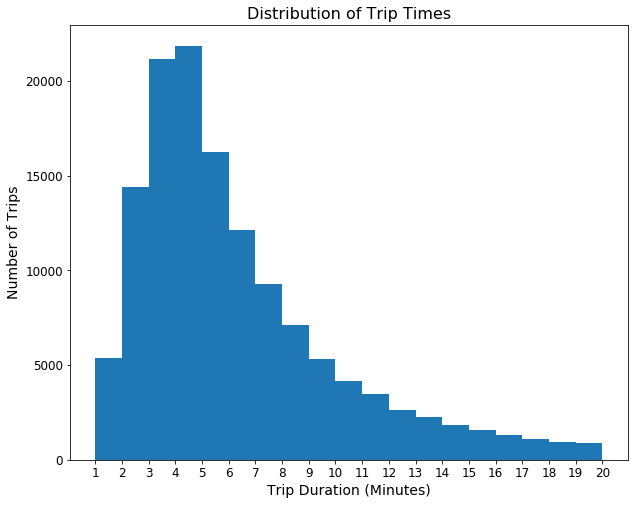

In [169]:
#Distribution of trip duration.
#Limited to trips under 20 minutes due to some outliers that would make the graph unreadable.
#Dataset provided by Motivate automatically excludes trips under 1 minute.

plt.hist(Data[Data['Trip_Duration'] < 1200]['Trip_Duration']/60, range = (1,20), bins = 19)

plt.xticks(range(1,21,1))
plt.tick_params(axis='both', which='major', labelsize=12)

plt.title('Distribution of Trip Times', fontsize=16)
plt.xlabel('Trip Duration (Minutes)', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.savefig('/Users/vijaykumarreddyvoddi/Downloads/Trip_Time_Dist.png')

In [170]:
#Proportion of trips that are between 3-5 minutes.

(len(Data[Data['Trip_Duration'] < (5*60)]) - len(Data[Data['Trip_Duration'] < (3*60)])) / len(Data)

0.29890145014140096

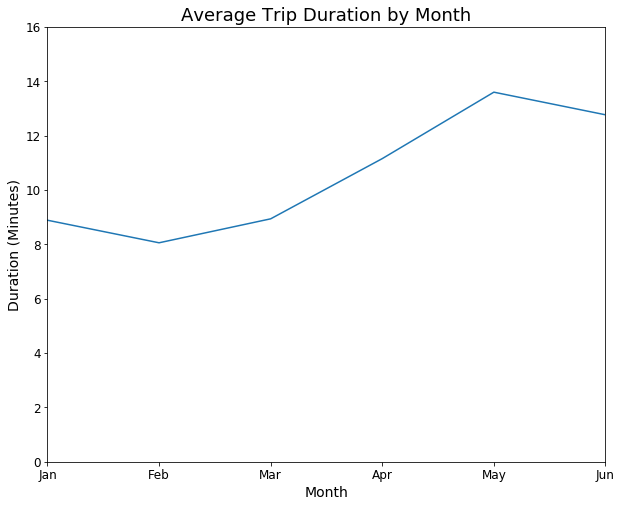

In [172]:
#How trip duration changes by month.

ax = (Data.groupby('Month').Trip_Duration.mean() / 60).plot()

ax.set_ylim(0)
ax.set_xlim(1, 6)
plt.xticks(range(1,7), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.yticks(range(0,18,2))
plt.tick_params(axis='both', which='major', labelsize=12)


plt.title('Average Trip Duration by Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Duration (Minutes)', fontsize=14)
plt.savefig('/Users/vijaykumarreddyvoddi/Downloads/Time_Month.png')

In [180]:
#Anaysis for metrics on riders, including:

#Gender
#Intersection of Age and Gender

In [181]:
#Analysis for metrics on ridership over time, including:

#Trips per month.
#Average trips by Day of Week.
#Average trips by Time of Day (Weekdays and Weekends).

In [182]:
#Sum of total trips per month.

Monthly = pd.DataFrame(Data.Month.value_counts())
Monthly.sort_index(inplace = True)
Monthly.head(6)

,Month
1,12677
2,15104
3,17109
4,23634
5,34456
6,40937


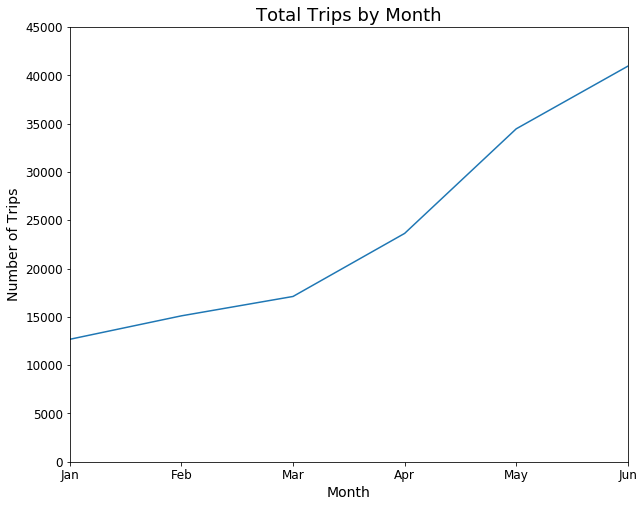

In [183]:
#Plot of total trips by month.

ax = Monthly.plot()

ax.legend_.remove()
ax.set_ylim(0, 45000)
ax.set_xlim(1, 6)
plt.xticks(Monthly.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.tick_params(axis='both', which='major', labelsize=12)


plt.title('Total Trips by Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.savefig('/Users/vijaykumarreddyvoddi/Downloads/Trips_Month.png')

In [184]:
#Number of trips for each day of year.

Daily = pd.DataFrame(Data.Day_Year.value_counts())
Daily.sort_index(inplace = True)
Daily.head()

,Day_Year
1,101
2,394
3,469
4,52
5,121


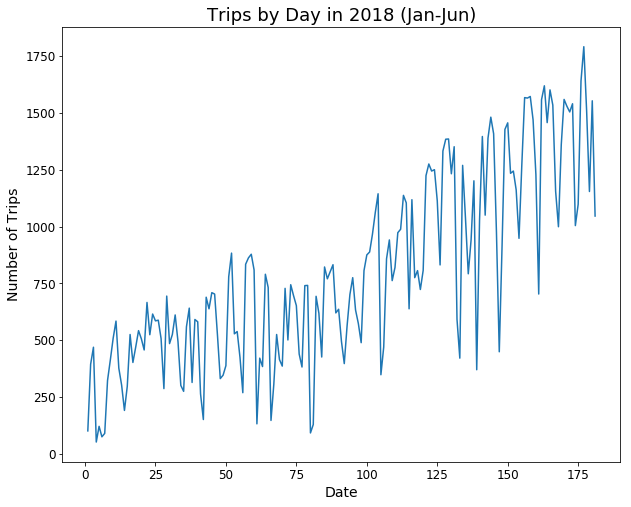

In [185]:
#Plot of total trips by day of the year.

ax = Daily.plot()

ax.legend_.remove()
plt.title('Trips by Day in 2018 (Jan-Jun)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/Users/vijaykumarreddyvoddi/Downloads/Trips_Day.png')

In [186]:
Data.head()

,Trip_ID,Trip_Duration,Start_Time,Stop_Time,Start_Station_ID,Start_Station_Name,Start_Station_Latitude,Start_Station_Longitude,End_Station_ID,End_Station_Name,...,Birth_Year,Gender,Age,Age_Group,Month,Day_Year,Day_Week,Day_Month,Hour,Date
0,1,932,2018-01-01 02:06:17.541,2018-01-01 02:21:50.027,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,...,1992,1,26,25 - 34,1,1,0,1,2,2018-01-01
1,2,550,2018-01-01 12:06:18.039,2018-01-01 12:15:28.443,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,...,1969,2,49,45 - 54,1,1,0,1,12,2018-01-01
2,3,510,2018-01-01 12:06:56.978,2018-01-01 12:15:27.810,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,...,1946,1,72,55 and Above,1,1,0,1,12,2018-01-01
3,4,354,2018-01-01 14:53:10.186,2018-01-01 14:59:05.096,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,...,1994,1,24,17 - 24,1,1,0,1,14,2018-01-01
4,5,250,2018-01-01 17:34:30.192,2018-01-01 17:38:40.984,3183,Exchange Place,40.716247,-74.033459,3639,Harborside,...,1991,1,27,25 - 34,1,1,0,1,17,2018-01-01


In [187]:
from pandas import ExcelWriter

writer = ExcelWriter('Data.xlsx')
Data.to_excel(writer,'Sheet1')
writer.save()

In [188]:
#Total number of rides by day of week.

Data.Day_Week.value_counts()

1    24066
2    22612
3    22480
4    22225
0    21992
5    17379
6    13163
Name: Day_Week, dtype: int64

In [189]:
#Trips on work weekdays (M-F) (Including Holidays).

len(Data[Data['Day_Week'] <5])

113375

In [190]:
#Trips on weekends (Sa + Su).

len(Data[Data['Day_Week'] >=5])

30542

In [191]:
#DataFrame of trips by day of week.

Weekday_Trips = Data.groupby('Day_Week').size().reset_index().rename(columns={'Day_Week': 'Weekday', 0:'Trips'})
Weekday_Trips

,Weekday,Trips
0,0,21992
1,1,24066
2,2,22612
3,3,22480
4,4,22225
5,5,17379
6,6,13163


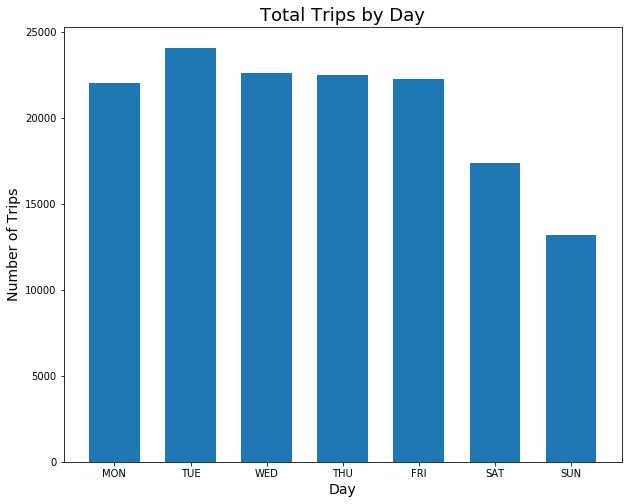

In [192]:
#Plot of total trips by day.

y = Weekday_Trips['Trips']
N = len(y)
x = Weekday_Trips['Weekday']
width = 1/1.5
plt.bar(x, y, width)
plt.title('Total Trips by Day', fontsize=18)
plt.xlabel('Day', fontsize=14)
plt.xticks(Weekday_Trips.index, ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
plt.ylabel('Number of Trips', fontsize=14)
plt.savefig('/Users/vijaykumarreddyvoddi/Downloads/Trips_ByDay.png')

In [193]:
#Creating a new dataframe with a DateTime index that will allow for plotting all trips over time more easily.

BikeFrame = pd.DataFrame(Data.Start_Time.value_counts())

#DataFrame named BikeFrame.

BikeFrame.index = pd.to_datetime(BikeFrame.index)
BikeFrame.sort_index(inplace = True)
BikeFrame.rename(columns={'Start_Time':'Count'}, inplace = True)
BikeFrame.head()

#This shows number of trips that occured by the second for 2017.

,Count
2018-01-01 00:01:45.814,1
2018-01-01 01:27:17.272,1
2018-01-01 01:29:03.020,1
2018-01-01 01:59:31.746,1
2018-01-01 02:06:17.541,1


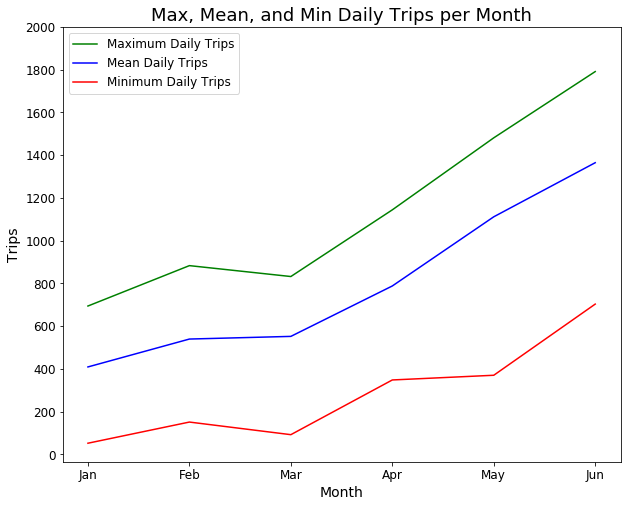

In [194]:
#Plotting mean, maximum, and minimum daily rides for each month.

a = BikeFrame.resample('D').sum().resample('M').max().reset_index(drop=True)
b = BikeFrame.resample('D').sum().resample('M').mean().reset_index(drop=True)
c = BikeFrame.resample('D').sum().resample('M').min().reset_index(drop=True)

plt.plot(a, 'g')
plt.plot(b, 'b')
plt.plot(c, 'r')

plt.legend(['Maximum Daily Trips', 'Mean Daily Trips', 'Minimum Daily Trips'], fontsize=12)
plt.xticks(range(0,6),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.yticks(range(0,2200,200))
plt.tick_params(axis='both', which='major', labelsize=12)

ax.set_ylim(0, 2200)
ax.set_xlim(0, 6)

plt.title('Max, Mean, and Min Daily Trips per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Trips', fontsize=14)
plt.savefig('/Users/vijaykumarreddyvoddi/Downloads/TripMetrics_Month.png')

In [195]:
#Data resampled on an hourly basis.

Hourly = BikeFrame.resample('H').sum()
Hourly.head()

,Count
2018-01-01 00:00:00,1
2018-01-01 01:00:00,3
2018-01-01 02:00:00,3
2018-01-01 03:00:00,7
2018-01-01 04:00:00,1


In [196]:
#Sum of total trips at each hour.

Hourly.groupby(Hourly.index.hour).sum()

,Count
0,1149
1,619
2,289
3,206
4,280
5,1526
6,4078
7,9571
8,16818
9,8548


In [197]:
#DataFrame of trips by hour of day.

Hour_Trips = Hourly.groupby(Hourly.index.hour).sum()
Hour_Trips

,Count
0,1149
1,619
2,289
3,206
4,280
5,1526
6,4078
7,9571
8,16818
9,8548


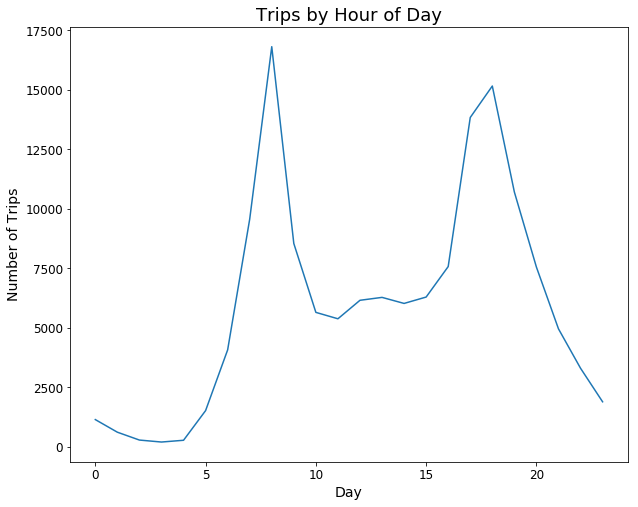

In [199]:
#Plot of total trips by hour of the year.

ax = Hour_Trips.plot()

ax.legend_.remove()
plt.title('Trips by Hour of Day', fontsize=18)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('/Users/vijaykumarreddyvoddi/Downloads/Trip_ByHour.png')

In [55]:
#Analyses related to how often Citi Bike stations in Jersey City are used, including:

#Total count of uses by month.
#Average number of uses per month.
#Trips between stations.
#Count of rebalancing of a bike between stations by Motivate.

In [200]:
#Counting the number of times each station served as the origin of a trip for each month.
Start_Point = Data.groupby(['Start_Station_Name', 'Month']).size().reset_index().rename(columns={'Start_Station_Name': 'Station', 0:'Start_Count'})
Start_Point.head()

,Station,Month,Start_Count
0,5 Corners Library,1,44
1,5 Corners Library,2,69
2,5 Corners Library,3,65
3,5 Corners Library,4,103
4,5 Corners Library,5,216


In [201]:
#Counting the number of times each station served as the destination of a trip for each month.
End_Point = Data.groupby(['End_Station_Name', 'Month']).size().reset_index().rename(columns={'End_Station_Name': 'Station', 0:'End_Count'})
End_Point = End_Point[End_Point['Station'].isin(Data.Start_Station_Name.unique())].reset_index(drop = True)
End_Point.head()

,Station,Month,End_Count
0,5 Corners Library,1,25
1,5 Corners Library,2,43
2,5 Corners Library,3,41
3,5 Corners Library,4,75
4,5 Corners Library,5,192


In [202]:
#Combining the number of times each station was used as an origin or destination for a Citi Bike trip.

Monthly_Station_Use = pd.merge(Start_Point, End_Point, on=['Station', 'Month'])

#Calculating a total use metric.

Monthly_Station_Use['Total'] = Monthly_Station_Use['End_Count'] + Monthly_Station_Use['Start_Count']

Monthly_Station_Use.to_csv('/Users/vijaykumarreddyvoddi/Downloads/Monthly_Station_Use.csv')

Monthly_Station_Use

,Station,Month,Start_Count,End_Count,Total
0,5 Corners Library,1,44,25,69
1,5 Corners Library,2,69,43,112
2,5 Corners Library,3,65,41,106
3,5 Corners Library,4,103,75,178
4,5 Corners Library,5,216,192,408
5,5 Corners Library,6,256,221,477
6,Astor Place,1,149,158,307
7,Astor Place,2,171,181,352
8,Astor Place,3,167,185,352
9,Astor Place,4,193,224,417


In [203]:
#Crosstab of the total number of times each station was used by month.

Monthly_Cross = pd.crosstab(index = Monthly_Station_Use.Station, columns = Monthly_Station_Use.Month, values = Monthly_Station_Use.Total, aggfunc = 'sum')
Monthly_Cross.to_csv('/Users/vijaykumarreddyvoddi/Downloads/Monthly_Cross.csv')
Monthly_Cross

Month,1,2,3,4,5,6
Station,,,,,,
5 Corners Library,69.0,112.0,106.0,178.0,408.0,477.0
Astor Place,307.0,352.0,352.0,417.0,499.0,552.0
Baldwin at Montgomery,351.0,352.0,446.0,535.0,740.0,880.0
Bayside Park,7.0,8.0,12.0,38.0,NaN,NaN
Bergen Ave,NaN,NaN,NaN,90.0,549.0,692.0
Bethune Center,3.0,12.0,10.0,23.0,NaN,NaN
Brunswick & 6th,612.0,793.0,921.0,995.0,1436.0,1682.0
Brunswick St,473.0,648.0,699.0,1015.0,1395.0,1641.0
Christ Hospital,118.0,146.0,246.0,345.0,380.0,394.0


In [60]:
#NaNs represent months where a station was not active.
#Leaving these as NaNs will make sure that they are not part of the calcualtion when taking the mean.
#Some stations legitimately had 0 uses in a single month.

In [204]:
#Average for each citi bike station by number of months.

Monthly_Means = Monthly_Cross.mean(axis = 1).reset_index().rename(columns = {0:'Avg_Trips'}).sort_values('Avg_Trips', ascending = False).reset_index(drop = True)
Monthly_Means.to_csv('/Users/vijaykumarreddyvoddi/Downloads/MonthlyMean.csv')
Monthly_Means

,Station,Avg_Trips
0,Grove St PATH,6234.833333
1,Exchange Place,2913.166667
2,Hamilton Park,2846.833333
3,Sip Ave,2432.000000
4,Newport PATH,2247.666667
5,Morris Canal,1514.500000
6,Harborside,1466.333333
7,Newport Pkwy,1397.000000
8,Newark Ave,1350.833333
9,City Hall,1298.333333


In [205]:
#Total number of uses for each station.

Monthly_Station_Use.groupby('Station').sum().loc[:,'Start_Count':'Total']

,Start_Count,End_Count,Total
Station,,,
5 Corners Library,753,597,1350
Astor Place,1202,1277,2479
Baldwin at Montgomery,1817,1487,3304
Bayside Park,34,31,65
Bergen Ave,701,630,1331
Bethune Center,24,24,48
Brunswick & 6th,3408,3031,6439
Brunswick St,3012,2859,5871
Christ Hospital,1027,602,1629


In [206]:
#Compelte list and counts of unique trips taken by Citi Bike riders.

Trips = Data.groupby(['Start_Station_Name','End_Station_Name']).size().reset_index().rename(columns={0:'Count'}).sort_values('Count', ascending = False).reset_index(drop = True)
Trips.head(25)

,Start_Station_Name,End_Station_Name,Count
0,Hamilton Park,Grove St PATH,3196
1,Grove St PATH,Hamilton Park,2509
2,Morris Canal,Exchange Place,2188
3,Brunswick & 6th,Grove St PATH,1781
4,Jersey & 6th St,Grove St PATH,1732
5,Exchange Place,Morris Canal,1656
6,Brunswick St,Grove St PATH,1652
7,McGinley Square,Sip Ave,1427
8,Van Vorst Park,Grove St PATH,1415
9,Sip Ave,McGinley Square,1369


In [208]:
#Proportion of trips that the top 25 routes make up.

Trips['PCT'] = (Trips['Count'] / len(Data))
Trips.head(25).PCT.sum()

0.2494632322797168

In [209]:
#Total number of unique routes, distribution of number of times each has been taken.

Trips['Count'].describe(include = 'all')

count    2367.000000
mean       60.801436
std       179.368766
min         1.000000
25%         3.000000
50%        11.000000
75%        45.000000
max      3196.000000
Name: Count, dtype: float64

In [210]:
Trips.head(25).to_csv('/Users/vijaykumarreddyvoddi/Downloads/Trips.csv')